In [9]:
MODEL = "RedHatAI/Llama-3.3-70B-Instruct-FP8-dynamic"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def make(path, engine):
    df = pd.read_json(path, lines=True)
    df["engine"] = engine
    df = df[df["model_id"] == MODEL]
    df_sorted = df.sort_values(by=["max_concurrency", "median_e2el_ms"], inplace=False)
    return df_sorted

def plot(df, ymax=None, metric="median_e2el_ms", ylabel="Median E2E Latency (ms)", title=""):
    
    plt.figure()
    for name, group in df.groupby('engine'):
        plt.plot(group['max_concurrency'], group[metric], marker='o', label=name)
    plt.xlabel('Concurrent')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    if ymax is not None:
        plt.ylim(0, ymax)
    plt.tight_layout()
    plt.show()

In [3]:
!ls results/*.json

results/rhaiis.json            results/sgl.json
results/rhoai.json             results/vllm-decode-heavy.json
results/sgl-decode-heavy.json  results/vllm-midstream.json
results/sgl-fp8.json           results/vllm.json


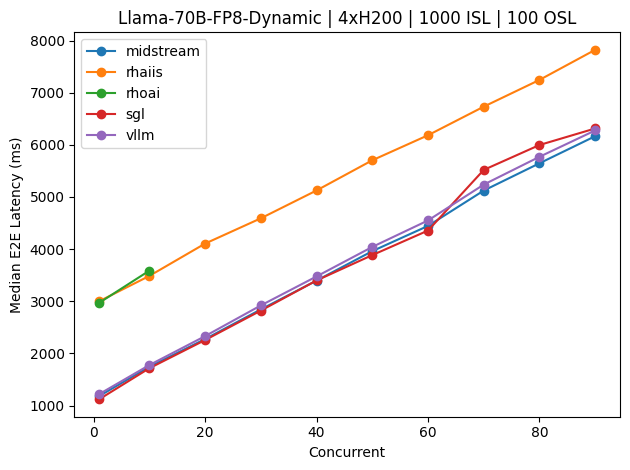

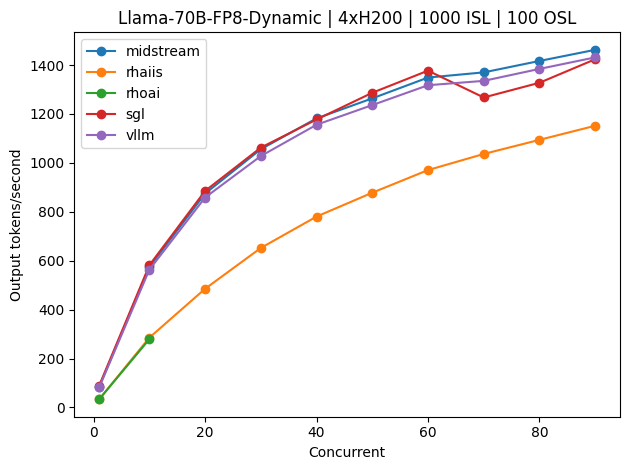

In [8]:
dfs = []

####################################
# Get Data
####################################
midstream = make(
    path="results/vllm-midstream.json",
    engine="midstream",
)
dfs.append(midstream)

sgl = make(
    path="results/sgl.json",
    engine="sgl",
)
dfs.append(sgl)

rhaiis = make(
    path="results/rhaiis.json",
    engine="rhaiis",
)
dfs.append(rhaiis)

rhoai = make(
    path="results/rhoai.json",
    engine="rhoai",
)
dfs.append(rhoai)

vllm = make(
    path="results/vllm.json",
    engine="vllm",
)
dfs.append(vllm)

####################################
# Combine
####################################
df = pd.concat(dfs, ignore_index=True)

TITLE = "Llama-70B-FP8-Dynamic | 4xH200 | 1000 ISL | 100 OSL"
plot(df, metric="median_e2el_ms", ylabel="Median E2E Latency (ms)", title=TITLE)
plot(df, metric="output_throughput", ylabel="Output tokens/second", title=TITLE)

In [5]:
!ls results/

rhaiis.json            sgl.json               vllm.json
sgl-decode-heavy.json  vllm-decode-heavy.json
sgl-fp8.json           vllm-midstream.json


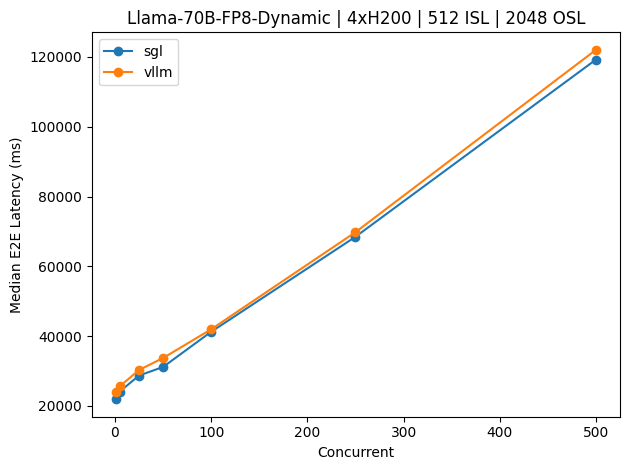

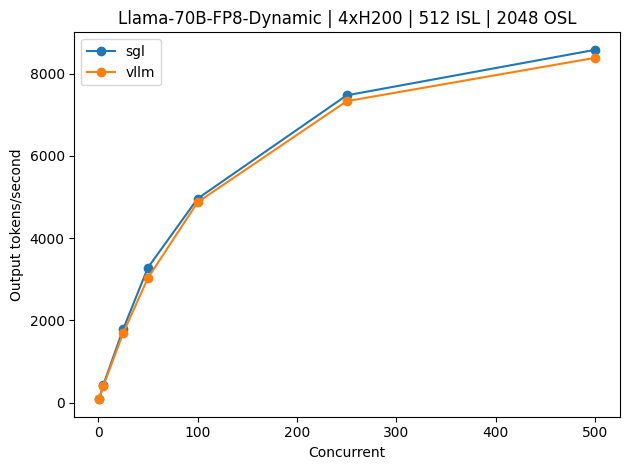

In [6]:
dfs = []

####################################
# Get Data
####################################
sgl = make(
    path="results/sgl-decode-heavy.json",
    engine="sgl",
)
dfs.append(sgl)


vllm = make(
    path="results/vllm-decode-heavy.json",
    engine="vllm",
)
dfs.append(vllm)

####################################
# Combine
####################################
df = pd.concat(dfs, ignore_index=True)

TITLE = "Llama-70B-FP8-Dynamic | 4xH200 | 512 ISL | 2048 OSL"
plot(df, metric="median_e2el_ms", ylabel="Median E2E Latency (ms)", title=TITLE)
plot(df, metric="output_throughput", ylabel="Output tokens/second", title=TITLE)

In [15]:
!ls results-take-2

rhaiis-tp1.json vllm-tp1.json   vllm-tp4.json


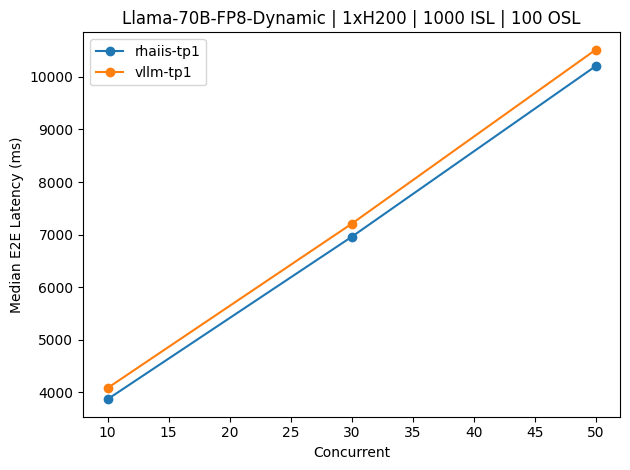

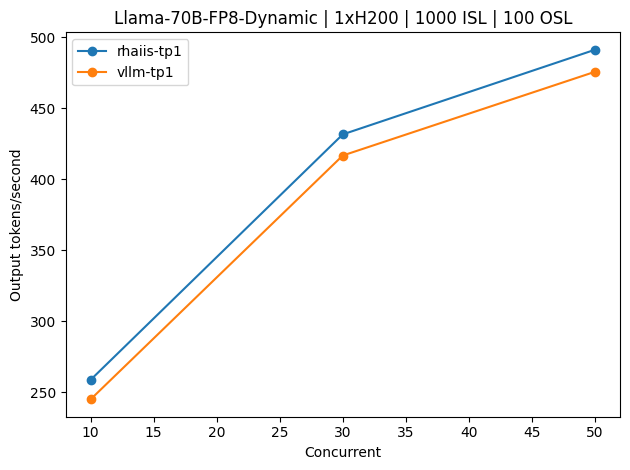

In [18]:
dfs = []

####################################
# Get Data
####################################
vllm_tp1 = make(
    path="results-take-2/vllm-tp1.json",
    engine="vllm-tp1",
)
dfs.append(vllm_tp1)

rhaiis_tp1 = make(
    path="results-take-2/rhaiis-tp1.json",
    engine="rhaiis-tp1",
)
dfs.append(rhaiis_tp1)

####################################
# Combine
####################################
df = pd.concat(dfs, ignore_index=True)

TITLE = "Llama-70B-FP8-Dynamic | 1xH200 | 1000 ISL | 100 OSL"
plot(df, metric="median_e2el_ms", ylabel="Median E2E Latency (ms)", title=TITLE)
plot(df, metric="output_throughput", ylabel="Output tokens/second", title=TITLE)

In [ ]:
dfs = []

####################################
# Get Data
####################################
vllm_tp4 = make(
    path="results-take-2/vllm-tp4.json",
    engine="vllm-tp4",
)
dfs.append(vllm_tp4)

rhaiis_tp4 = make(
    path="results-take-2/rhaiis-tp4.json",
    engine="rhaiis-tp4",
)
dfs.append(rhaiis_tp4)

####################################
# Combine
####################################
df = pd.concat(dfs, ignore_index=True)

TITLE = "Llama-70B-FP8-Dynamic | 1xH200 | 1000 ISL | 100 OSL"
plot(df, metric="median_e2el_ms", ylabel="Median E2E Latency (ms)", title=TITLE)
plot(df, metric="output_throughput", ylabel="Output tokens/second", title=TITLE)